The goal of learning is reached


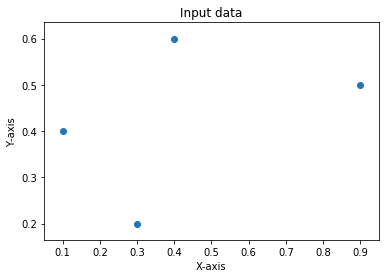

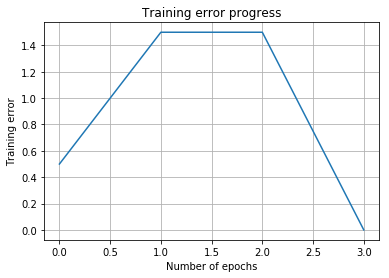

In [2]:
# 11.2 perceptron
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

# Define input data
data = np.array([[0.3, 0.2], [0.1, 0.4], [0.4, 0.6], [0.9, 0.5]])
labels = np.array([[0], [0], [0], [1]])

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

# Define a perceptron with 2 inputs;
# Each element of the list in the first argument 
# specifies the min and max values of the inputs
perceptron = nl.net.newp([[0, 1],[0, 1]], 1)

# Train the perceptron
error = perceptron.train(data, labels, epochs=50, show=15, lr=0.01)

# plot results
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.title('Training error progress')

plt.show()

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
The maximum number of train epochs is reached


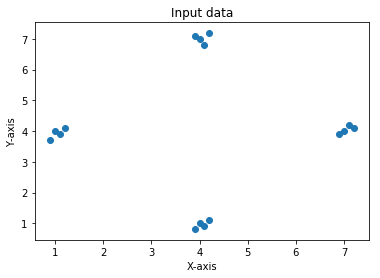

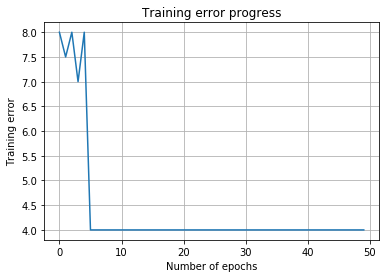

[[0. 0.]]
[[1. 0.]]
[[1. 1.]]


In [4]:
# 11.3 single layer
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Define input data
input_file = 'data_single_layer.txt'
input_text = np.loadtxt(input_file)
data = input_text[:, 0:2]
labels = input_text[:, 2:]

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

# Min and max values for each dimension
x_min, x_max = data[:,0].min(), data[:,0].max()
y_min, y_max = data[:,1].min(), data[:,1].max()

# Define a single-layer neural network with 2 neurons;
# Each element in the list (first argument) specifies the 
# min and max values of the inputs
single_layer_net = nl.net.newp([[x_min, x_max], [y_min, y_max]], 2)

# Train the neural network
error = single_layer_net.train(data, labels, epochs=50, show=20, lr=0.01)

# Plot results
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

print(single_layer_net.sim([[0.3, 4.5]]))
print(single_layer_net.sim([[4.5, 0.5]]))
print(single_layer_net.sim([[4.3, 8]]))

Epoch: 100; Error: 0.6787060548536058;
Epoch: 200; Error: 0.08978650793446645;
Epoch: 300; Error: 0.018906787877590113;
Epoch: 400; Error: 0.014933131337478475;
Epoch: 500; Error: 0.024831523375580353;
Epoch: 600; Error: 0.03255780529876212;
Epoch: 700; Error: 0.018274505535269398;
Epoch: 800; Error: 0.01783614329030409;
The maximum number of train epochs is reached


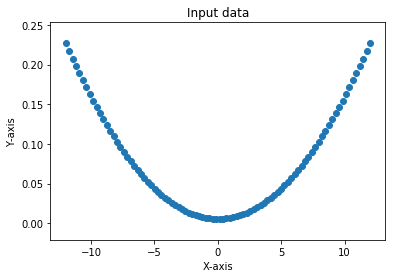

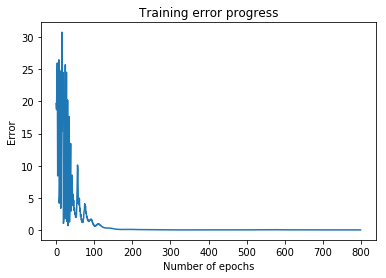

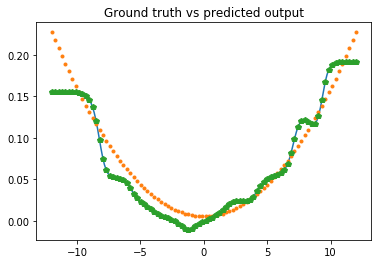

In [5]:
# 11.4 deep neural network
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
min_value = -12
max_value = 12
num_datapoints = 90
x = np.linspace(min_value, max_value, num_datapoints)
y = 2 * np.square(x) + 7
y /= np.linalg.norm(y)

data = x.reshape(num_datapoints, 1)
labels = y.reshape(num_datapoints, 1)

# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

# Define a multilayer neural network with 2 hidden layers;
# Each hidden layer consists of 10 neurons and the output layer 
# consists of 1 neuron
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])

# Change the training algorithm to gradient descent
multilayer_net.trainf = nl.train.train_gd

# Train the network
error = multilayer_net.train(data, labels, epochs=800, show=100, goal=0.01)

# Predict the output for the training inputs 
predicted_output = multilayer_net.sim(data)

# Plot training error
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# Plot predictions
x2 = np.linspace(min_value, max_value, num_datapoints * 2)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_datapoints)

plt.figure()
plt.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
plt.title('Ground truth vs predicted output')

plt.show()

In [ ]:
# 11.5 
